# import modules

In [6]:
%quickref


IPython -- An enhanced Interactive Python - Quick Reference Card

obj?, obj??      : Get help, or more help for object (also works as
                   ?obj, ??obj).
?foo.*abc*       : List names in 'foo' containing 'abc' in them.
%magic           : Information about IPython's 'magic' % functions.

Magic functions are prefixed by % or %%, and typically take their arguments
without parentheses, quotes or even commas for convenience.  Line magics take a
single % and cell magics are prefixed with two %%.

Example magic function calls:

%alias d ls -F   : 'd' is now an alias for 'ls -F'
alias d ls -F    : Works if 'alias' not a python name
alist = %alias   : Get list of aliases to 'alist'
cd /usr/share    : Obvious. cd -<tab> to choose from visited dirs.
%cd??            : See help AND source for magic %cd
%timeit x=10     : time the 'x=10' statement with high precision.
%%timeit x=2**100
x**100           : time 'x**100' with a setup of 'x=2**100'; setup code is not
                   co

In [9]:
%hist

print?
%quickref
%cd??
%cd
%magic
%quickref
_dh
_oh
%hist


In [183]:
from preparation import get_train_valid
from matplotlib import pyplot as plt

import seaborn as sns
import numpy as np
import pandas as pd

# Load data

Define constants 

In [184]:
TARGET = "Transported"

In [185]:
train_data, valid_data = get_train_valid()
target = train_data[TARGET]
train_data = train_data.drop(columns=TARGET)

datasets = [train_data, valid_data]

In [186]:
display(train_data.head(3))
display(valid_data.head(3))

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus


In [187]:
display(train_data.describe())
display(valid_data.describe())

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [188]:
display(train_data.describe(include="O"))
display(valid_data.describe(include="O"))

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,4277,4190,4184,4177,4185,4184,4183
unique,4277,3,2,3265,3,2,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,False,Cints Erle
freq,1,2263,2640,8,2956,4110,2


# Transfrom data

Home planet is unknown in 201 rows. Let's consider "PassengerId". If passengers in one group and some of them have None value, we'll fill this value the same, as known passanger

Create "group" column that include "gggg" in "gggg_pp" form "PassengerId"

In [189]:
train_data["group"] = train_data["PassengerId"].map(lambda x: x[:4]).astype(int)
train_data["members_in_group"] = train_data["PassengerId"].map(lambda x: x[5:]).astype(int)
train_data = train_data.drop(columns="PassengerId")


`Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.`

Transform data

In [191]:
def split_cabin(index):
    def split_cabin_(x):
        if isinstance(x, float):
            return x
        else:
            return x.split("/")[index]
    return split_cabin_


train_data["deck"] = train_data["Cabin"].map(split_cabin(0))
train_data["num"] = train_data["Cabin"].map(split_cabin(1)).astype(float)
train_data["side"] = train_data["Cabin"].map(split_cabin(2))
train_data = train_data.drop(columns="Cabin")


In [192]:
train_data[["deck", "num", "side"]].nunique()

deck       8
num     1817
side       2
dtype: int64

In [193]:
train_data["expenses"] = train_data[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1).astype(int)
train_data = train_data.drop(["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], axis=1)

In [194]:
train_data.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,Name,group,members_in_group,deck,num,side,expenses
0,Europa,False,TRAPPIST-1e,39.0,False,Maham Ofracculy,1,1,B,0.0,P,0
1,Earth,False,TRAPPIST-1e,24.0,False,Juanna Vines,2,1,F,0.0,S,736
2,Europa,False,TRAPPIST-1e,58.0,True,Altark Susent,3,1,A,0.0,S,10383


# Fill none values

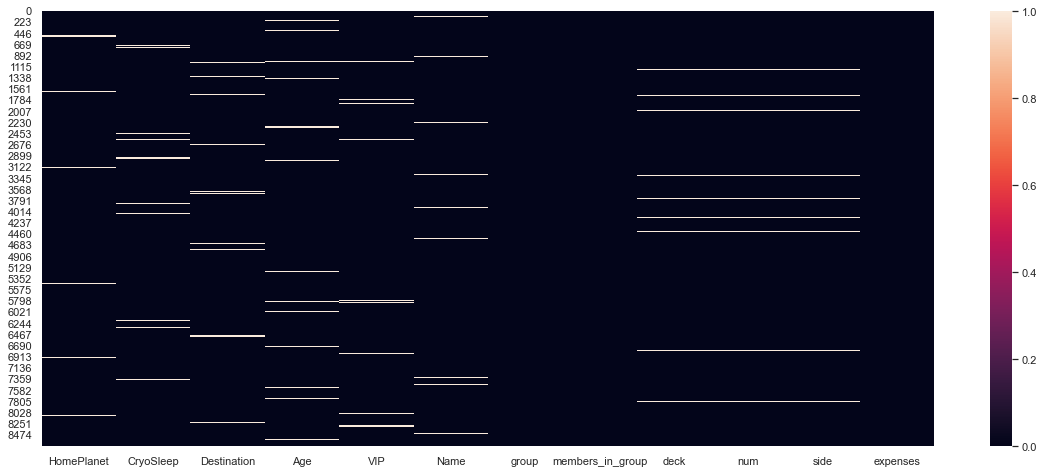

In [195]:
# plt.figure(figsize=(20,8))
sns.set(rc={"figure.figsize": (20, 8)})
sns.heatmap(train_data.isnull())
plt.show()

In [196]:
def fill_none_planet(x):
    if x.isna().any():
        value = "Earth"
    else:
        value = x.value_counts().keys()[0]
    return x.fillna(value)


train_data["HomePlanet"] = train_data.groupby("group")["HomePlanet"].transform(fill_none_planet)

In [197]:
def fill_none_destination(x):
    if x.isna().any():
        value = "TRAPPIST-1e"
    else:
        value = x.value_counts().keys()[0]
    return x.fillna(value)


train_data["Destination"] = train_data.groupby("group")["Destination"].transform(fill_none_destination)

In [198]:
cryosleep_median = train_data["CryoSleep"].median()

In [199]:
def fill_none_cryosleep(x):
    if x.isna().any():
        value = cryosleep_median
    else:
        value = x.value_counts().keys()[0]
    return x.fillna(value)


train_data["CryoSleep"] = train_data.groupby("group")["CryoSleep"].transform(fill_none_cryosleep)

27.0
28.82793046746535


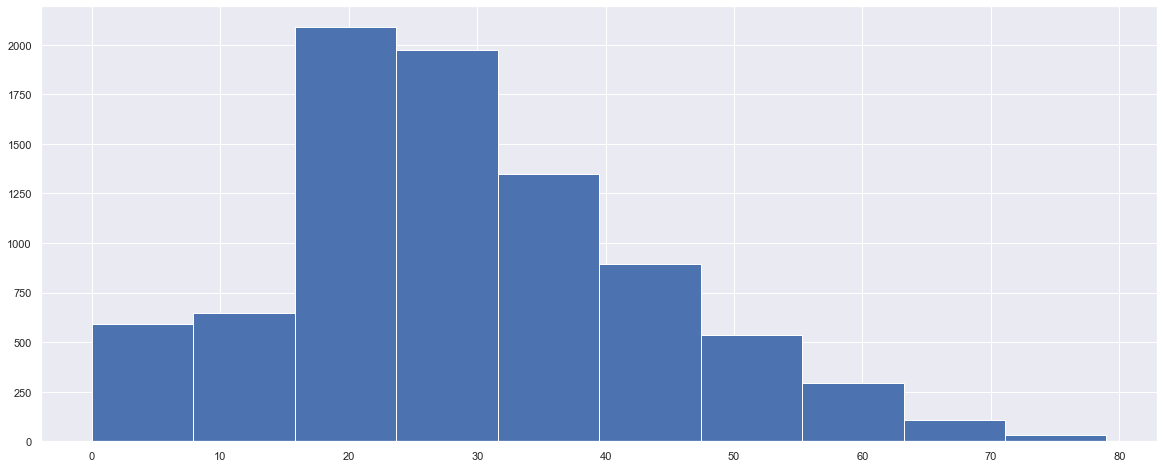

In [200]:
train_data.Age.hist()
print(train_data.Age.median())
print(train_data.Age.mean())
median_age = train_data.Age.median()
None

In [201]:
train_data.Age.fillna(train_data.Age.median(), inplace=True)

In [202]:
is_VIP = train_data.VIP.mode()
is_VIP

0    False
Name: VIP, dtype: object

In [203]:
def fill_none_VIP(x):
    if x.isna().any():
        value = is_VIP
    else:
        value = x.value_counts().keys()[0]
    return x.fillna(value)


train_data["VIP"] = train_data.groupby("group")["VIP"].transform(fill_none_VIP)

In [204]:
train_data.isna().sum()

HomePlanet            0
CryoSleep             0
Destination           0
Age                   0
VIP                 203
Name                200
group                 0
members_in_group      0
deck                199
num                 199
side                199
expenses              0
dtype: int64

In [ ]:
.rolling ()

In [206]:
train_data.deck.fillna(train_data["deck"].mode(), inplace=True)
train_data.side.fillna(train_data["side"].mode(), inplace=True)
train_data.deck.fillna(train_data["deck"].mode(), inplace=True)

In [210]:
train_data["num"] = train_data["num"].rolling(window=2, min_periods=1).mean()

0          0.0
1          0.0
2          0.0
3          0.0
4          1.0
         ...  
8688      98.0
8689    1499.0
8690    1500.0
8691     608.0
8692     608.0
Name: num, Length: 8693, dtype: float64

In [216]:
train_data["num"].isna().sum()

199

In [223]:
train_data["num"].expanding(1).max()

0          0.0
1          0.0
2          0.0
3          0.0
4          1.0
         ...  
8688    1894.0
8689    1894.0
8690    1894.0
8691    1894.0
8692    1894.0
Name: num, Length: 8693, dtype: float64